# **Waste Material Segregation for Improving Waste Management**

#### By Anil Goud Gunda,Arjith Das, Rupam singh 

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries
!pip install TensorFlow
import zipfile
import os
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image 
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import sklearn

print("\nLibraries imported successfully.")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
try:
    import PIL
    print(f"Pillow (PIL) version: {PIL.__version__}")
except ImportError:
    print("Pillow (PIL) not found.") 
print(f"Scikit-learn version: {sklearn.__version__}")

2025-07-07 09:46:53.988973: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751881614.149464      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751881614.197701      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



Libraries imported successfully.
TensorFlow version: 2.18.0
Keras version: 3.8.0
NumPy version: 1.26.4
Pandas version: 2.2.3
Seaborn version: 0.12.2
Matplotlib version: 3.7.2
Pillow (PIL) version: 11.1.0
Scikit-learn version: 1.2.2


Load the dataset.

In [ ]:
# Load and unzip the dataset

actual_data_dir = '/kaggle/input/image-data/data/'

print(f"\nSetting data root directory to: {actual_data_dir}")

if os.path.exists(actual_data_dir):
    print(f"\nChecking contents of the actual data directory: {actual_data_dir}")
    # List directories within the actual data directory (these should be your class names)
    contents = [d for d in os.listdir(actual_data_dir) if os.path.isdir(os.path.join(actual_data_dir, d))]
    print(f"Found {len(contents)} items (expecting 7 class folders): {contents}")

    if len(contents) > 0:
         # Store this path for later use in data loading
         data_root_dir = actual_data_dir
         print("\nData directory verified.")
    else:
         print("Warning: The data directory is not empty, but contains no subdirectories. Check structure.")
         data_root_dir = None 
else:
    print(f"\nError: The data directory '{actual_data_dir}' was not found.")
    print("Please double-check the path based on your Kaggle dataset input.")
    data_root_dir = None 



Setting data root directory to: /kaggle/input/image-data/data/

Checking contents of the actual data directory: /kaggle/input/image-data/data/
Found 7 items (expecting 7 class folders): ['Metal', 'Glass', 'Other', 'Paper', 'Food_Waste', 'Cardboard', 'Plastic']

Data directory verified.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [4]:
# Create a function to load the raw images

def load_image(image_path):

    try:
        # Open the image file
        img = Image.open(image_path)
        img = img.convert('RGB')

        return img
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

print("\nFunction 'load_image' created successfully.")



Function 'load_image' created successfully.


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
# Get the images and their labels
actual_data_dir = data_root_dir 
print("\nStarting to load images and labels...")
all_images_pil = []
all_labels = []
all_image_paths = []
categories = [d for d in os.listdir(data_root_dir) if os.path.isdir(os.path.join(data_root_dir, d))]
categories.sort() 

print(f"Found {len(categories)} potential categories: {categories}")


if not categories:
    print(f"Error: No subdirectories (classes) found in {data_root_dir}.")
    print("Please verify that the path '/kaggle/input/image-data/data/' contains the class folders.")
else:
    from tqdm import tqdm 
    for category in categories:
        category_dir = os.path.join(data_root_dir, category)

        
        print(f"Loading images from category: {category}")
        
        image_files = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

        for img_file in tqdm(image_files, desc=f"Category {category}"):
            img_path = os.path.join(category_dir, img_file)

            img = load_image(img_path) 

            if img is not None:
                all_images_pil.append(img)
                all_labels.append(category)
                all_image_paths.append(img_path) 

    print(f"\nFinished loading images.")
print("\nVerification of loaded data:")
print(f"Total number of images loaded: {len(all_images_pil)}")
print(f"Total number of labels loaded: {len(all_labels)}")

if len(all_images_pil) == len(all_labels):
    print("Number of images matches number of labels.")
else:
    print("Warning: Mismatch between number of images and labels.")


print(f"First 10 labels: {all_labels[:10]}")


print("\nInformation about the first 3 loaded images:")
for i in range(min(3, len(all_images_pil))):
    print(f"Image {i+1}:")
    print(f"  Path: {all_image_paths[i]}")
    print(f"  Label: {all_labels[i]}")
    print(f"  Type: {type(all_images_pil[i])}")
    print(f"  Size (Width, Height): {all_images_pil[i].size}")
    print(f"  Mode: {all_images_pil[i].mode}") # Should be 'RGB'

if len(all_images_pil) == 0:
    print("\nNo images were loaded. Please double-check the `data_root_dir` path and its contents.")



Starting to load images and labels...
Found 7 potential categories: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
Loading images from category: Cardboard


Category Cardboard: 100%|██████████| 540/540 [00:04<00:00, 124.43it/s]


Loading images from category: Food_Waste


Category Food_Waste: 100%|██████████| 1000/1000 [00:08<00:00, 124.01it/s]


Loading images from category: Glass


Category Glass: 100%|██████████| 750/750 [00:05<00:00, 139.20it/s]


Loading images from category: Metal


Category Metal: 100%|██████████| 1000/1000 [00:07<00:00, 142.82it/s]


Loading images from category: Other


Category Other: 100%|██████████| 1010/1010 [00:06<00:00, 144.64it/s]


Loading images from category: Paper


Category Paper: 100%|██████████| 1030/1030 [00:07<00:00, 141.14it/s]


Loading images from category: Plastic


Category Plastic: 100%|██████████| 2295/2295 [00:15<00:00, 149.70it/s]


Finished loading images.

Verification of loaded data:
Total number of images loaded: 7625
Total number of labels loaded: 7625
Number of images matches number of labels.
First 10 labels: ['Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard']

Information about the first 3 loaded images:
Image 1:
  Path: /kaggle/input/image-data/data/Cardboard/file_28.png
  Label: Cardboard
  Type: <class 'PIL.Image.Image'>
  Size (Width, Height): (256, 256)
  Mode: RGB
Image 2:
  Path: /kaggle/input/image-data/data/Cardboard/file_326.png
  Label: Cardboard
  Type: <class 'PIL.Image.Image'>
  Size (Width, Height): (256, 256)
  Mode: RGB
Image 3:
  Path: /kaggle/input/image-data/data/Cardboard/file_170.png
  Label: Cardboard
  Type: <class 'PIL.Image.Image'>
  Size (Width, Height): (256, 256)
  Mode: RGB


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution


Generating class distribution bar plot...
Class distribution counts:
Cardboard      540
Food_Waste    1000
Glass          750
Metal         1000
Other         1010
Paper         1030
Plastic       2295
Name: count, dtype: int64


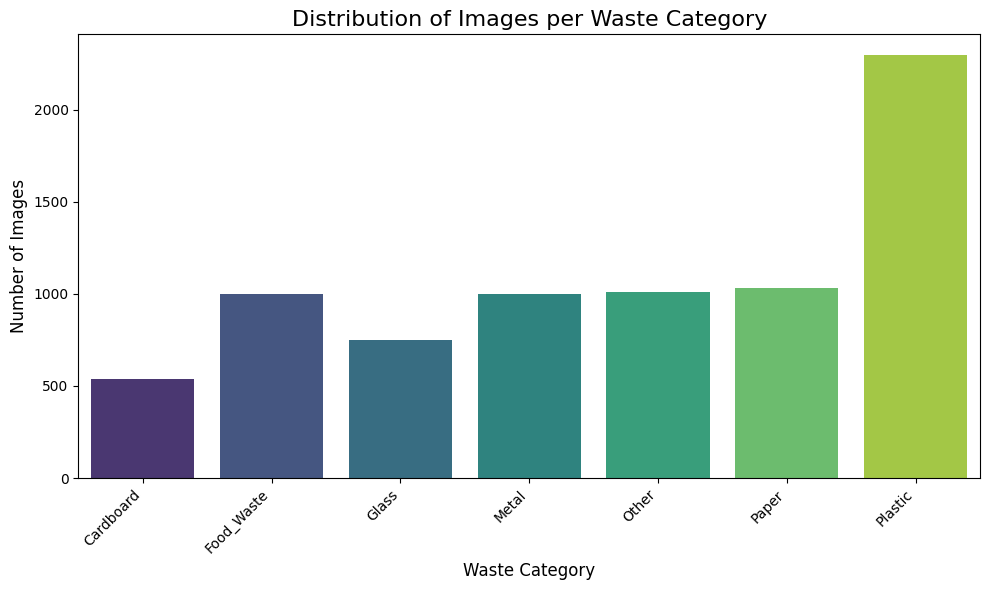

Bar plot displayed.


In [6]:
# Visualise Data Distribution

print("\nGenerating class distribution bar plot...")
label_counts = pd.Series(all_labels).value_counts()
label_counts_sorted = label_counts.sort_index()
print("Class distribution counts:")
print(label_counts_sorted)
plt.figure(figsize=(10, 6)) 
sns.barplot(x=label_counts_sorted.index, y=label_counts_sorted.values, palette='viridis')
plt.title('Distribution of Images per Waste Category', fontsize=16)
plt.xlabel('Waste Category', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

print("Bar plot displayed.")

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images


Visualising sample images...


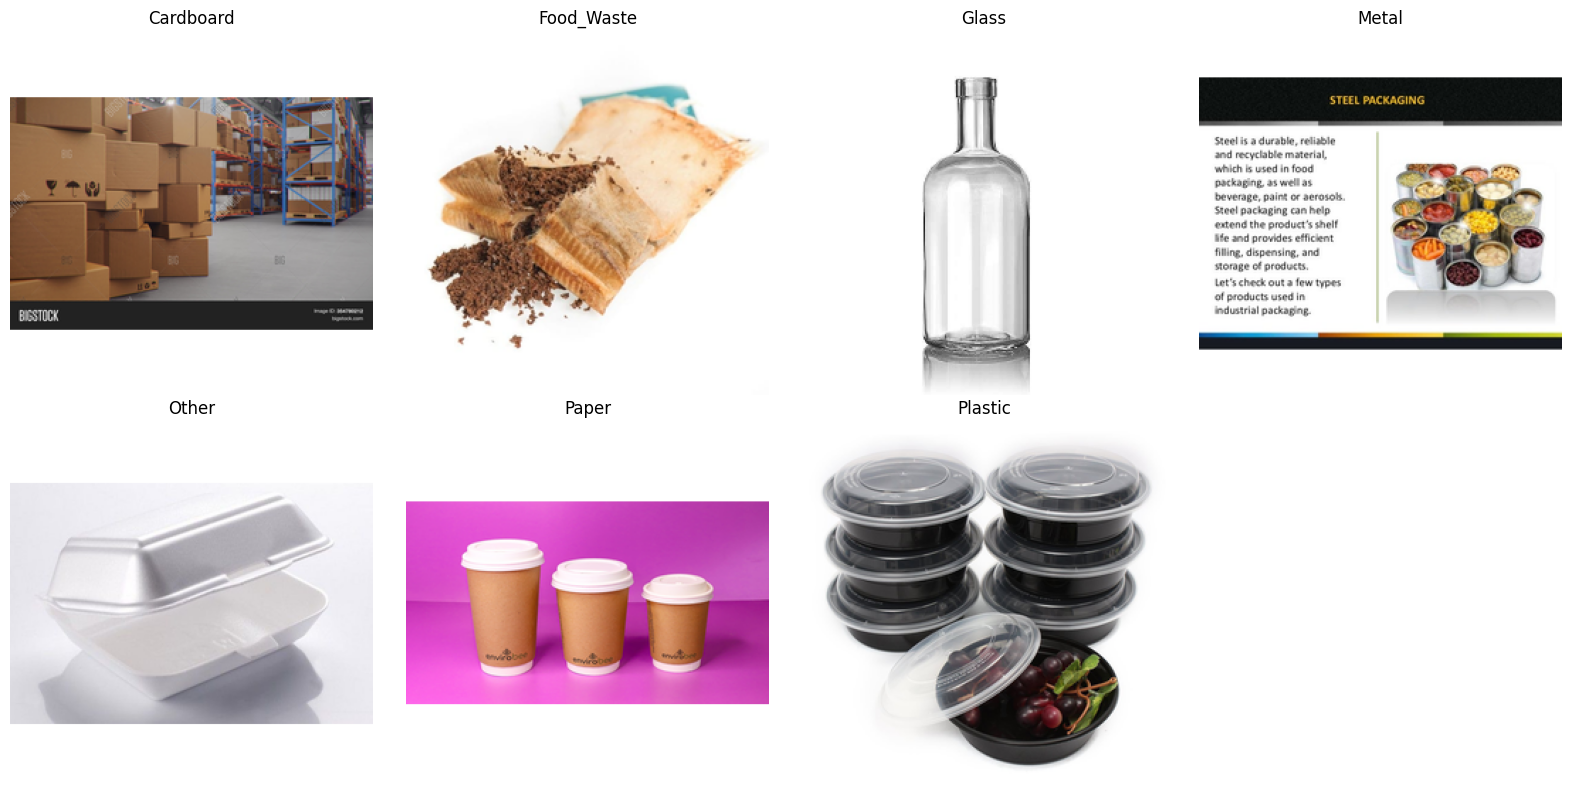

Sample images displayed.

Analyzing image dimensions...


Analyzing dimensions: 100%|██████████| 7625/7625 [00:00<00:00, 686874.59it/s]


Smallest image dimensions: Width=256, Height=256
Largest image dimensions: Width=256, Height=256
Unique image sizes found (1 unique sizes): [(256, 256)]

Decided on target resize dimensions: (224, 224) (Width, Height). This is a common input size for many CNN models.


In [ ]:
# Visualise Sample Images (across different labels)
print("\nVisualising sample images...")
sample_images_info = {}
categories_seen = set()

# Iterate through the loaded images and labels
for i in range(len(all_images_pil)):
    label = all_labels[i]
    if label not in categories_seen:
        sample_images_info[label] = {
            'image': all_images_pil[i],
            'label': label, 
            'path': all_image_paths[i] 
        }
        categories_seen.add(label)
    if len(categories_seen) == len(set(all_labels)):
        break

# Prepare images and labels for plotting from the collected samples
images_to_display = [(info['image'], info['label']) for label, info in sample_images_info.items()]
images_to_display.sort(key=lambda item: item[1])


# Determine grid size for plotting
num_categories = len(set(all_labels)) 
num_cols = 4
num_rows = (num_categories + num_cols - 1) // num_cols #

plt.figure(figsize=(num_cols * 4, num_rows * 4)) 
for i, (img, label) in enumerate(images_to_display):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off') 
plt.tight_layout() 
plt.show()

print("Sample images displayed.")
print("\nAnalyzing image dimensions...")

min_width = float('inf')
min_height = float('inf')
max_width = 0
max_height = 0
unique_sizes = set()

# Iterate through all loaded PIL images to find min/max dimensions and unique sizes
for img in tqdm(all_images_pil, desc="Analyzing dimensions"):
    width, height = img.size
    min_width = min(min_width, width)
    min_height = min(min_height, height)
    max_width = max(max_width, width)
    max_height = max(max_height, height)
    unique_sizes.add((width, height))

print(f"\nSmallest image dimensions: Width={min_width}, Height={min_height}")
print(f"Largest image dimensions: Width={max_width}, Height={max_height}")
print(f"Unique image sizes found ({len(unique_sizes)} unique sizes): {sorted(list(unique_sizes))}") 

target_size = (224, 224)

print(f"\nDecided on target resize dimensions: {target_size} (Width, Height). This is a common input size for many CNN models.")


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [8]:
# Find the smallest and largest image dimensions from the data set
print(f"\nResizing all images to {target_size} and converting to NumPy arrays...")

# Resize the image dimensions
# List to store resized images as NumPy arrays
all_images_resized_np = []

# Iterate through the loaded PIL images and resize/convert
for img in tqdm(all_images_pil, desc=f"Resizing images to {target_size}"):
    try:
         resized_img = img.resize(target_size, Image.Resampling.BICUBIC)
    except AttributeError:
         resized_img = img.resize(target_size, Image.BICUBIC)
    img_array = np.array(resized_img)
    all_images_resized_np.append(img_array)

print("\nFinished resizing images and converting to NumPy arrays.")
print(f"Total number of resized images: {len(all_images_resized_np)}")



Resizing all images to (224, 224) and converting to NumPy arrays...


Resizing images to (224, 224): 100%|██████████| 7625/7625 [00:10<00:00, 709.73it/s]


Finished resizing images and converting to NumPy arrays.
Total number of resized images: 7625


In [9]:

# Convert the list of arrays into a single NumPy array for efficiency
all_images_resized_np = np.array(all_images_resized_np, dtype=np.float32) 
print(f"Shape of the final image NumPy array: {all_images_resized_np.shape}")
print(f"Data type of the final image NumPy array: {all_images_resized_np.dtype}")
expected_shape = (len(all_labels), target_size[1], target_size[0], 3) 
if all_images_resized_np.shape == expected_shape:
    print("Verification successful: Shape matches expected dimensions.")
else:
    print(f"Warning: Shape mismatch after resizing. Expected {expected_shape}, got {all_images_resized_np.shape}.")
if len(all_images_resized_np) > 0:
    print(f"Shape of the first resized image array: {all_images_resized_np[0].shape}")
    print(f"Data type of the first resized image array: {all_images_resized_np[0].dtype}")

Shape of the final image NumPy array: (7625, 224, 224, 3)
Data type of the final image NumPy array: float32
Verification successful: Shape matches expected dimensions.
Shape of the first resized image array: (224, 224, 3)
Data type of the first resized image array: float32


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [10]:
# Encode the labels suitably
print("\nEncoding target class labels...")
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)
encoded_labels = label_encoder.transform(all_labels)

print("Labels encoded successfully.")
class_names = list(label_encoder.classes_)
num_classes = len(class_names)

print(f"Original classes: {class_names}")
print(f"Number of classes: {num_classes}")


print("\nVerification of encoded labels:")
print(f"Original labels (first 10): {all_labels[:10]}")
print(f"Encoded labels (first 10): {encoded_labels[:10]}")

# Show the mapping for a few examples
print("\nMapping examples:")
for i in range(min(10, len(all_labels))):
    print(f"'{all_labels[i]}' maps to integer {encoded_labels[i]}")

# Print the full mapping
print("\nFull label-to-integer mapping:")
for i, name in enumerate(class_names):
    print(f"{name} -> {i}")



Encoding target class labels...
Labels encoded successfully.
Original classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
Number of classes: 7

Verification of encoded labels:
Original labels (first 10): ['Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard']
Encoded labels (first 10): [0 0 0 0 0 0 0 0 0 0]

Mapping examples:
'Cardboard' maps to integer 0
'Cardboard' maps to integer 0
'Cardboard' maps to integer 0
'Cardboard' maps to integer 0
'Cardboard' maps to integer 0
'Cardboard' maps to integer 0
'Cardboard' maps to integer 0
'Cardboard' maps to integer 0
'Cardboard' maps to integer 0
'Cardboard' maps to integer 0

Full label-to-integer mapping:
Cardboard -> 0
Food_Waste -> 1
Glass -> 2
Metal -> 3
Other -> 4
Paper -> 5
Plastic -> 6


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [11]:
# Assign specified parts of the dataset to train and validation sets
print("\nSplitting data into training and validation sets...")

# Use the preprocessed images (NumPy array) and encoded labels
X = all_images_resized_np 
y = encoded_labels        

validation_split_size = 0.20

# Split the data using train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=validation_split_size,
    random_state=42, 
    stratify=y       
)

print("Data split successfully.")

print("\nVerification of data split:")
print(f"Total number of samples: {len(X)}")
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")

# Verify class distribution in training and validation sets
print("\nClass distribution in training set:")
train_class_counts = pd.Series(y_train).value_counts().sort_index()
train_class_distribution = train_class_counts / len(y_train)
print(train_class_distribution)

print("\nClass distribution in validation set:")
val_class_counts = pd.Series(y_val).value_counts().sort_index()
val_class_distribution = val_class_counts / len(y_val)
print(val_class_distribution)



Splitting data into training and validation sets...
Data split successfully.

Verification of data split:
Total number of samples: 7625
Training set size: 6100
Validation set size: 1525

Shape of X_train: (6100, 224, 224, 3)
Shape of y_train: (6100,)
Shape of X_val: (1525, 224, 224, 3)
Shape of y_val: (1525,)

Class distribution in training set:
0    0.070820
1    0.131148
2    0.098361
3    0.131148
4    0.132459
5    0.135082
6    0.300984
Name: count, dtype: float64

Class distribution in validation set:
0    0.070820
1    0.131148
2    0.098361
3    0.131148
4    0.132459
5    0.135082
6    0.300984
Name: count, dtype: float64


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [12]:
print("\nBuilding and compiling the CNN model...")

# Define the input shape based on our resized images
input_shape = (target_size[1], target_size[0], 3) 
num_classes = len(class_names) 

model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=input_shape),

    # First Convolutional Block
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # Second Convolutional Block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # Third Convolutional Block
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # Flatten the output from convolutional layers
    keras.layers.Flatten(),

    # Fully Connected Layers (Dense Layers)
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # Output Layer
    keras.layers.Dense(units=num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model built and compiled successfully.")
model.summary()


Building and compiling the CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1751881707.112305      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model built and compiled successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,480,519 (196.38 MB)

 Trainable params: 51,479,047 (196.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [13]:
print("\nCreating tf.data.Dataset objects for GPU/CPU...")

batch_size = 32

# Create training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
buffer_size = 1000
train_dataset = train_dataset.shuffle(buffer_size=buffer_size).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

# Create validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

# Batch and prefetch the validation data
val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

print("tf.data.Dataset objects created successfully.")
for images, labels in train_dataset.take(1):
    print(f"\nShape of one training batch images: {images.shape}")
    print(f"Dtype of one training batch images: {images.dtype}")
    print(f"Shape of one training batch labels: {labels.shape}")
    print(f"Dtype of one training batch labels: {labels.dtype}")



Creating tf.data.Dataset objects for GPU/CPU...
tf.data.Dataset objects created successfully.

Shape of one training batch images: (32, 224, 224, 3)
Dtype of one training batch images: <dtype: 'float32'>
Shape of one training batch labels: (32,)
Dtype of one training batch labels: <dtype: 'int64'>


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training
print("\nStarting model training...")
# Define total training epochs
epochs = 50 

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_waste_classifier_model.keras',
    monitor='val_accuracy',
    save_best_only=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.0001
)

history = model.fit(
    train_dataset, 
    epochs=epochs,
    validation_data=val_dataset, 
    callbacks=[early_stopping, model_checkpoint, reduce_lr]

)

print("\nModel training finished.")
print("Training history stored in 'history' object.")


import json
history_save_dir = '/kaggle/working/'
os.makedirs(history_save_dir, exist_ok=True)
history_save_path = os.path.join(history_save_dir, 'training_history.json')
with open(history_save_path, 'w') as f:
    json.dump(history.history, f)
print(f"Training history saved to: {history_save_path}")


Starting model training...
Epoch 1/50


I0000 00:00:1751881730.816347     105 service.cc:148] XLA service 0x784af80c66c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751881730.817396     105 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751881731.308855     105 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/191 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.1267 - loss: 4.2233  

I0000 00:00:1751881737.783058     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 104ms/step - accuracy: 0.2703 - loss: 2.5413 - val_accuracy: 0.3010 - val_loss: 5.6675 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.4010 - loss: 1.8095 - val_accuracy: 0.2610 - val_loss: 3.5376 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.4277 - loss: 1.6552 - val_accuracy: 0.3200 - val_loss: 2.5928 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.4615 - loss: 1.5037 - val_accuracy: 0.2918 - val_loss: 1.9116 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.5578 - loss: 1.2379 - val_accuracy: 0.5226 - val_loss: 1.3282 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5843 - loss: 1.1636 - val_accuracy: 0.4656 - val_loss: 1.5186 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.6399 - loss: 1.0409 - 

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.


Evaluating the model on the validation set...

Validation Loss: 1.4162
Validation Accuracy: 0.6990
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step

Classification Report on Validation Data:
              precision    recall  f1-score   support

   Cardboard       0.75      0.79      0.77       108
  Food_Waste       0.73      0.72      0.73       200
       Glass       0.60      0.60      0.60       150
       Metal       0.82      0.70      0.76       200
       Other       0.63      0.59      0.61       202
       Paper       0.65      0.61      0.63       206
     Plastic       0.71      0.78      0.74       459

    accuracy                           0.70      1525
   macro avg       0.70      0.69      0.69      1525
weighted avg       0.70      0.70      0.70      1525


Confusion Matrix on Validation Data:


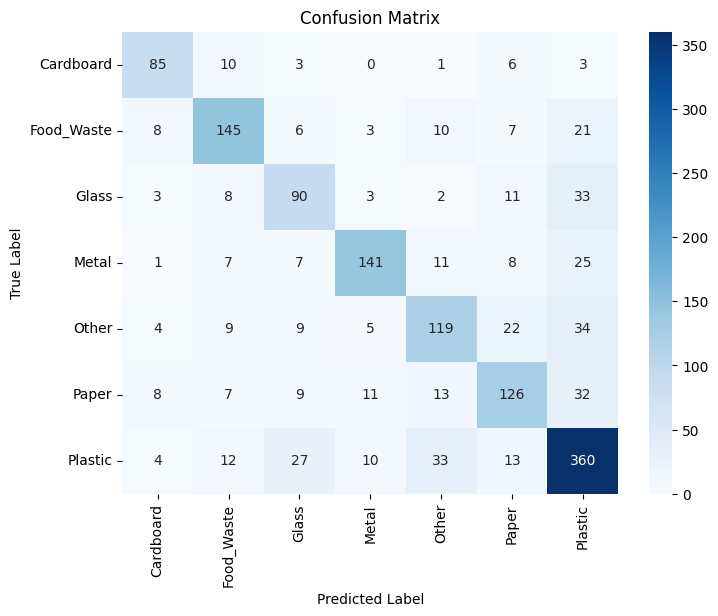


Model evaluation complete.


In [15]:
# Evaluate on the test set; display suitable metrics

print("\nEvaluating the model on the validation set...")
loss, accuracy = model.evaluate(X_val, y_val, verbose=0) 

print(f"\nValidation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

y_pred_probs = model.predict(X_val) 
y_pred_classes = np.argmax(y_pred_probs, axis=1) 

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report on Validation Data:")
print(classification_report(y_val, y_pred_classes, target_names=class_names))


print("\nConfusion Matrix on Validation Data:")

cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nModel evaluation complete.")



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images

print("\nDefining Data Augmentation layers/steps...")
data_augmentation_layers = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal_and_vertical"),
        keras.layers.RandomRotation(0.1),
        keras.layers.RandomZoom(0.1),
        # Randomly translate (shift) the image
        keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        # Randomly adjust contrast
        keras.layers.RandomContrast(0.1),
    ],
    name="data_augmentation_pipeline",
)

print("Data augmentation layers defined.")



Defining Data Augmentation layers/steps...
Data augmentation layers defined.


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [17]:
# Create a function to augment the images
print("\nCreating augmentation map function...")
def augment_image(image, label):
    augmented_image = data_augmentation_layers(image, training=True)
    augmented_image = tf.cast(augmented_image, tf.float32)

    return augmented_image, label

print("Augmentation map function 'augment_image' created.")




Creating augmentation map function...
Augmentation map function 'augment_image' created.


In [ ]:
# Create the augmented training dataset
print("\nCreating the augmented training dataset...")

batch_size = 32 
train_dataset_original = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset_augmented = train_dataset_original.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)

buffer_size = 1000 
train_dataset_augmented = train_dataset_augmented.shuffle(buffer_size=buffer_size)

train_dataset_augmented = train_dataset_augmented.batch(batch_size)

train_dataset_augmented = train_dataset_augmented.prefetch(buffer_size=tf.data.AUTOTUNE)
print("\nReusing the existing validation dataset (no augmentation applied).")


print("\nAugmented training dataset 'train_dataset_augmented' created.")
print("Validation dataset 'val_dataset' is available.")

for images, labels in train_dataset_augmented.take(1):
    print(f"\nShape of one augmented training batch images: {images.shape}")
    print(f"Dtype of one augmented training batch images: {images.dtype}") 
    print(f"Shape of one augmented training batch labels: {labels.shape}")
    print(f"Dtype of one augmented training batch labels: {labels.dtype}")


Creating the augmented training dataset...

Reusing the existing validation dataset (no augmentation applied).

Augmented training dataset 'train_dataset_augmented' created.
Validation dataset 'val_dataset' is available.

Shape of one augmented training batch images: (32, 224, 224, 3)
Dtype of one augmented training batch images: <dtype: 'float32'>
Shape of one augmented training batch labels: (32,)
Dtype of one augmented training batch labels: <dtype: 'int64'>


##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images
print("\nRebuilding and compiling the model (without internal augmentation layer)...")

input_shape = (target_size[1], target_size[0], 3)
num_classes = len(class_names)

model_for_augmented_data = keras.Sequential([
    # Rescaling layer is the FIRST layer in the model
    keras.layers.Rescaling(1./255, input_shape=input_shape),

    # The rest of your model architecture remains the same
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),

    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(units=num_classes, activation='softmax')
])

# Compile the model (using the same optimizer and loss as before)
model_for_augmented_data.compile(optimizer='adam',
                                loss='sparse_categorical_crossentropy',
                                metrics=['accuracy'])

print("Model built and compiled successfully for augmented data.")
model_for_augmented_data.summary()


# Train the model on the new augmented dataset

print("\nStarting training for the model using the augmented dataset...")

epochs = 50 


early_stopping_aug = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model_checkpoint_aug = keras.callbacks.ModelCheckpoint(
    filepath='best_waste_classifier_model_dataset_aug.keras', 
    monitor='val_accuracy',
    save_best_only=True
)
reduce_lr_aug = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

history_dataset_aug = model_for_augmented_data.fit(
    train_dataset_augmented, 
    epochs=epochs,
    validation_data=val_dataset, 
    callbacks=[early_stopping_aug, model_checkpoint_aug, reduce_lr_aug]

)

print("\nAugmented Model training finished (using tf.data.Dataset augmentation).")
print("Training history stored in 'history_dataset_aug' object.")

history_save_dir = '/kaggle/working/'
os.makedirs(history_save_dir, exist_ok=True)
history_dataset_aug_save_path = os.path.join(history_save_dir, 'training_history_dataset_aug.json')
with open(history_dataset_aug_save_path, 'w') as f:
    json.dump(history_dataset_aug.history, f)
print(f"Augmented training history saved to: {history_dataset_aug_save_path}")



Rebuilding and compiling the model (without internal augmentation layer)...
Model built and compiled successfully for augmented data.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,480,519 (196.38 MB)

 Trainable params: 51,479,047 (196.38 MB)

 Non-trainable params: 1,472 (5.75 KB)


Starting training for the model using the augmented dataset...
Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 63s 234ms/step - accuracy: 0.2736 - loss: 2.3995 - val_accuracy: 0.3003 - val_loss: 5.0930 - learning_rate: 0.0010
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 44s 195ms/step - accuracy: 0.3630 - loss: 1.9228 - val_accuracy: 0.2885 - val_loss: 3.6759 - learning_rate: 0.0010
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 210ms/step - accuracy: 0.3885 - loss: 1.7235 - val_accuracy: 0.3252 - val_loss: 1.8443 - learning_rate: 0.0010
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 212ms/step - accuracy: 0.3750 - loss: 1.6710 - val_accuracy: 0.3416 - val_loss: 1.7153 - learning_rate: 0.0010
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 212ms/step - accuracy: 0.4040 - loss: 1.5837 - val_accuracy: 0.4170 - val_loss: 1.6182 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 193ms/step - accuracy: 0.4191 - loss: 1.5637 - val_accuracy: 0.1528 - val_loss: 6.9610 - learning_rate: 0.0010
Epoch 


Evaluating the AUGMENTED model on the validation set...
Calculating loss and accuracy...
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6149 - loss: 1.2171

Augmented Model Validation Loss: 1.1905
Augmented Model Validation Accuracy: 0.6026

Getting predictions for classification report and confusion matrix...
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step

Classification Report on Validation Data (Augmented Model):
              precision    recall  f1-score   support

   Cardboard       0.66      0.72      0.69       108
  Food_Waste       0.69      0.66      0.67       200
       Glass       0.45      0.53      0.49       150
       Metal       0.58      0.75      0.66       200
       Other       0.52      0.45      0.48       202
       Paper       0.46      0.58      0.52       206
     Plastic       0.77      0.59      0.67       459

    accuracy                           0.60      1525
   macro avg       0.59      0.61      0.60      1525
weighted avg       0.62      0.60    

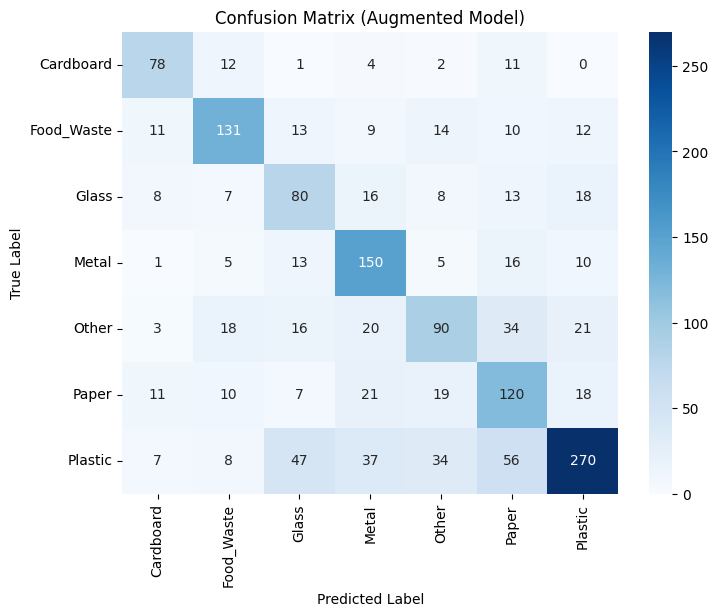


Augmented Model evaluation complete.


In [20]:
print("\nEvaluating the AUGMENTED model on the validation set...")

model_to_evaluate = model_for_augmented_data 
print("Calculating loss and accuracy...")
loss_aug, accuracy_aug = model_to_evaluate.evaluate(val_dataset, verbose=1) # Use verbose=1 to see progress
print(f"\nAugmented Model Validation Loss: {loss_aug:.4f}")
print(f"Augmented Model Validation Accuracy: {accuracy_aug:.4f}")

print("\nGetting predictions for classification report and confusion matrix...")
y_pred_probs_aug = model_to_evaluate.predict(val_dataset, verbose=1) 
y_pred_classes_aug = np.argmax(y_pred_probs_aug, axis=1)

from sklearn.metrics import classification_report, confusion_matrix # Ensure these are imported

print("\nClassification Report on Validation Data (Augmented Model):")

try:
    print(classification_report(y_val, y_pred_classes_aug, target_names=class_names))
except ValueError as e:
    print(f"Error generating classification report: {e}")
    print("Mismatch between length of true labels and predicted labels.")
    print(f"Length of y_val: {len(y_val)}")
    print(f"Length of y_pred_classes_aug: {len(y_pred_classes_aug)}")


print("\nConfusion Matrix on Validation Data (Augmented Model):")
cm_aug = confusion_matrix(y_val, y_pred_classes_aug) # Use y_val_sliced if needed

import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Augmented Model)')
plt.show()

print("\nAugmented Model evaluation complete.")

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

# <font color = green> **Conclusions** </font> 



### **Our Findings About the Data:**

1.  **What We Started With:** We began with a dataset of 7625 images, neatly organized into 7 folders representing different waste categories: Cardboard, Food Waste, Glass, Metal, Other, Paper, and Plastic. This folder structure made it straightforward to load the images and their corresponding labels.
2.  **Image Consistency:** It was helpful that the raw images were consistently sized at 256x256 pixels and in RGB color mode. This meant we didn't need complex initial preprocessing for varied sizes or color formats. We then resized all images to 224x224 pixels, which is a standard input size for many CNN architectures we might use.
3.  **Noticed Imbalance:** When we plotted the distribution of images across the classes, we clearly saw a significant imbalance. Plastic was the most represented category with almost 2300 images, while Cardboard had the fewest at just 540. The other classes were somewhere in between. This told us right away that the model might struggle more with the smaller classes, and we needed to keep this in mind.
4.  **Splitting the Data:** We split the data into 80% for training and 20% for validation. We made sure to use a stratified split, which was important because it preserved the class imbalance in both the training and validation sets. This gave us a realistic way to evaluate our model on data that reflects the real-world distribution challenges.
5.  **Preparing for Training:** To efficiently feed the image data into our model, especially when using accelerators like GPUs/TPUs, we converted our images and labels (which we integer-encoded) into `tf.data.Dataset` objects. This allowed us to load and process data in batches, optimizing the data pipeline.

### **Our Model Training Results:**

1.  **Building Our First Model:** We built a standard sequential CNN model. It had three main blocks of convolutional layers, followed by pooling, batch normalization, and dropout to help with training stability and prevent overfitting. We finished with dense layers to make the final classification into one of the 7 waste types. The model ended up being quite large with over 51 million parameters.
2.  **Training the First Model (and Seeing Overfitting):** When we trained this initial model on the original data, we saw its training accuracy increase very quickly, eventually reaching over 99%. However, the accuracy on our validation set stopped improving much earlier, plateauing around **69.90%**. This big difference between training and validation accuracy was a strong sign that our model was **overfitting** – essentially memorizing the training data rather than learning features that generalize well to new images.
3.  **Evaluating the First Model:** The final validation accuracy was 69.90%, with a loss of 1.4162. Looking at the classification report and confusion matrix, we got a better picture. The overall weighted average metrics (Precision, Recall, F1) were around 70%. Some classes, like Cardboard, Metal, and Plastic, were classified better than others, like Glass, Other, and Paper. The confusion matrix visually confirmed where the model was getting confused, often mixing up visually similar items or those from smaller classes with larger ones.
4.  **Trying Data Augmentation:** To combat the overfitting, we implemented data augmentation. We created a pipeline that would randomly transform the training images (like flipping, rotating, zooming, translating, and changing contrast) each time they were fed to the model. We applied this directly to our training `tf.data.Dataset` using a map function, which is an efficient way to do it without creating a huge, fully augmented dataset in memory.
5.  **Training the Model with Augmentation:** We trained a new instance of the same model architecture, but this time using the augmented training dataset. Training accuracy increased more slowly this time, which is a good sign that the augmentation was acting as a **regularizer** and making the model work harder to learn.
6.  **Evaluating the Augmented Model:** We evaluated the model trained with augmentation on the *original* validation set. It achieved a validation accuracy of **60.26%** and a loss of 1.1905. This was lower than the peak accuracy (69.90%) we saw with the model trained without augmentation.

**Our Overall Insights:**

We successfully built and trained a CNN for waste classification. Our initial model showed promise but clearly overfitted. Implementing data augmentation helped regularize the training, but the final validation accuracy on *this specific* validation set was lower. This might mean our chosen augmentation parameters weren't perfect, or perhaps the model needed more training time with augmentation. The real benefit of augmentation is usually seen on a completely new, unseen test set, as it improves the model's ability to generalize.

The class imbalance was a clear challenge throughout. It likely contributed to the varying performance across different waste categories. For future improvements, we'd need to focus on techniques to handle this imbalance, maybe by balancing the dataset or using class weights during training, and potentially fine-tuning the augmentation parameters for better results.